In [1]:
from keras.datasets import mnist
from keras.datasets import boston_housing
import matplotlib.pyplot as plt
import numpy as np
import random
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.regularizers import l1, l2
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


In [2]:
random.seed(171276)

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 1us/step


In [42]:
scaler1 = StandardScaler()
scaler1.fit(train_data)
train_data = scaler1.transform(train_data)
scaler2 = StandardScaler()
scaler2.fit(test_data)
test_data = scaler2.transform(test_data)


## Model 1

In [47]:
def scalar_model1():
    model = Sequential()
    model.add(Dense(64, input_dim=train_data.shape[1], \
                    activation='relu'))
    model.add(Dense(64, input_dim=train_data.shape[1], \
                    activation='relu'))
    model.add(Dense(1))
    
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])
    return model

In [25]:
## k-fold validation
import sklearn
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
k = 10
validation = KFold(n_splits=10, shuffle=True, random_state=171276)

In [49]:
num_val_samples = len(train_data) // k 
num_epochs = 100
all_scores = []
all_histories = []

In [50]:
validation.get_n_splits(train_data)
k_ind = 1
for train_index, test_index in validation.split(train_data):
    print("processing fold #", k_ind)
    X_train, X_test = train_data[train_index], train_data[test_index]
    y_train, y_test = train_targets[train_index], train_targets[test_index]
    model = scalar_model1()
    fit_i = model.fit(X_train, y_train, epochs=num_epochs,\
                              batch_size=1, verbose = 2)
    loss_mse, val_mse = model.evaluate(X_test, y_test, verbose = 0)
    all_scores.append(val_mse)
    all_histories.append(fit_i)
    k_ind += 1
        

processing fold # 1
Epoch 1/100
 - 2s - loss: 218.5442 - mean_squared_error: 218.5442
Epoch 2/100
 - 1s - loss: 29.1932 - mean_squared_error: 29.1932
Epoch 3/100
 - 1s - loss: 21.1229 - mean_squared_error: 21.1229
Epoch 4/100
 - 1s - loss: 17.3163 - mean_squared_error: 17.3163
Epoch 5/100
 - 1s - loss: 15.0552 - mean_squared_error: 15.0552
Epoch 6/100
 - 1s - loss: 13.8224 - mean_squared_error: 13.8224
Epoch 7/100
 - 1s - loss: 12.8588 - mean_squared_error: 12.8588
Epoch 8/100
 - 1s - loss: 11.6653 - mean_squared_error: 11.6653
Epoch 9/100
 - 1s - loss: 11.2249 - mean_squared_error: 11.2249
Epoch 10/100
 - 1s - loss: 11.0623 - mean_squared_error: 11.0623
Epoch 11/100
 - 1s - loss: 10.7650 - mean_squared_error: 10.7650
Epoch 12/100
 - 1s - loss: 9.6458 - mean_squared_error: 9.6458
Epoch 13/100
 - 1s - loss: 9.5906 - mean_squared_error: 9.5906
Epoch 14/100
 - 1s - loss: 9.4734 - mean_squared_error: 9.4734
Epoch 15/100
 - 1s - loss: 9.3351 - mean_squared_error: 9.3351
Epoch 16/100
 - 1s -

Epoch 30/100
 - 1s - loss: 7.1175 - mean_squared_error: 7.1175
Epoch 31/100
 - 1s - loss: 6.9500 - mean_squared_error: 6.9500
Epoch 32/100
 - 1s - loss: 6.7048 - mean_squared_error: 6.7048
Epoch 33/100
 - 1s - loss: 6.6673 - mean_squared_error: 6.6673
Epoch 34/100
 - 1s - loss: 6.5130 - mean_squared_error: 6.5130
Epoch 35/100
 - 1s - loss: 6.5171 - mean_squared_error: 6.5171
Epoch 36/100
 - 1s - loss: 6.6983 - mean_squared_error: 6.6983
Epoch 37/100
 - 1s - loss: 6.1532 - mean_squared_error: 6.1532
Epoch 38/100
 - 1s - loss: 6.2758 - mean_squared_error: 6.2758
Epoch 39/100
 - 1s - loss: 6.2301 - mean_squared_error: 6.2301
Epoch 40/100
 - 1s - loss: 6.0208 - mean_squared_error: 6.0208
Epoch 41/100
 - 1s - loss: 6.0897 - mean_squared_error: 6.0897
Epoch 42/100
 - 1s - loss: 5.7843 - mean_squared_error: 5.7843
Epoch 43/100
 - 1s - loss: 5.8096 - mean_squared_error: 5.8096
Epoch 44/100
 - 1s - loss: 5.6854 - mean_squared_error: 5.6854
Epoch 45/100
 - 1s - loss: 5.8900 - mean_squared_error:

Epoch 60/100
 - 1s - loss: 6.4837 - mean_squared_error: 6.4837
Epoch 61/100
 - 1s - loss: 6.2873 - mean_squared_error: 6.2873
Epoch 62/100
 - 1s - loss: 6.4030 - mean_squared_error: 6.4030
Epoch 63/100
 - 1s - loss: 6.1144 - mean_squared_error: 6.1144
Epoch 64/100
 - 1s - loss: 6.1633 - mean_squared_error: 6.1633
Epoch 65/100
 - 1s - loss: 6.0800 - mean_squared_error: 6.0800
Epoch 66/100
 - 1s - loss: 6.0602 - mean_squared_error: 6.0602
Epoch 67/100
 - 1s - loss: 5.8569 - mean_squared_error: 5.8569
Epoch 68/100
 - 1s - loss: 5.8294 - mean_squared_error: 5.8294
Epoch 69/100
 - 1s - loss: 5.4856 - mean_squared_error: 5.4856
Epoch 70/100
 - 1s - loss: 5.8090 - mean_squared_error: 5.8090
Epoch 71/100
 - 1s - loss: 5.7000 - mean_squared_error: 5.7000
Epoch 72/100
 - 1s - loss: 5.7765 - mean_squared_error: 5.7765
Epoch 73/100
 - 1s - loss: 5.4275 - mean_squared_error: 5.4275
Epoch 74/100
 - 1s - loss: 5.8605 - mean_squared_error: 5.8605
Epoch 75/100
 - 1s - loss: 5.7107 - mean_squared_error:

Epoch 90/100
 - 1s - loss: 4.9961 - mean_squared_error: 4.9961
Epoch 91/100
 - 1s - loss: 4.8285 - mean_squared_error: 4.8285
Epoch 92/100
 - 1s - loss: 4.5559 - mean_squared_error: 4.5559
Epoch 93/100
 - 1s - loss: 5.5394 - mean_squared_error: 5.5394
Epoch 94/100
 - 1s - loss: 5.0975 - mean_squared_error: 5.0975
Epoch 95/100
 - 1s - loss: 4.8872 - mean_squared_error: 4.8872
Epoch 96/100
 - 1s - loss: 4.5537 - mean_squared_error: 4.5537
Epoch 97/100
 - 1s - loss: 4.9559 - mean_squared_error: 4.9559
Epoch 98/100
 - 1s - loss: 4.7608 - mean_squared_error: 4.7608
Epoch 99/100
 - 1s - loss: 4.7332 - mean_squared_error: 4.7332
Epoch 100/100
 - 1s - loss: 4.5030 - mean_squared_error: 4.5030
processing fold # 5
Epoch 1/100
 - 2s - loss: 178.5214 - mean_squared_error: 178.5214
Epoch 2/100
 - 1s - loss: 29.1615 - mean_squared_error: 29.1615
Epoch 3/100
 - 1s - loss: 21.0187 - mean_squared_error: 21.0187
Epoch 4/100
 - 1s - loss: 16.7629 - mean_squared_error: 16.7629
Epoch 5/100
 - 1s - loss: 15

Epoch 19/100
 - 1s - loss: 7.5626 - mean_squared_error: 7.5626
Epoch 20/100
 - 1s - loss: 7.6296 - mean_squared_error: 7.6296
Epoch 21/100
 - 1s - loss: 7.2516 - mean_squared_error: 7.2516
Epoch 22/100
 - 1s - loss: 7.4004 - mean_squared_error: 7.4004
Epoch 23/100
 - 1s - loss: 6.9090 - mean_squared_error: 6.9090
Epoch 24/100
 - 1s - loss: 6.8612 - mean_squared_error: 6.8612
Epoch 25/100
 - 1s - loss: 6.7886 - mean_squared_error: 6.7886
Epoch 26/100
 - 1s - loss: 7.0920 - mean_squared_error: 7.0920
Epoch 27/100
 - 1s - loss: 6.4525 - mean_squared_error: 6.4525
Epoch 28/100
 - 1s - loss: 6.3638 - mean_squared_error: 6.3638
Epoch 29/100
 - 1s - loss: 6.5488 - mean_squared_error: 6.5488
Epoch 30/100
 - 1s - loss: 6.4335 - mean_squared_error: 6.4335
Epoch 31/100
 - 1s - loss: 6.5625 - mean_squared_error: 6.5625
Epoch 32/100
 - 1s - loss: 5.9158 - mean_squared_error: 5.9158
Epoch 33/100
 - 1s - loss: 6.2058 - mean_squared_error: 6.2058
Epoch 34/100
 - 1s - loss: 5.9877 - mean_squared_error:

Epoch 49/100
 - 1s - loss: 5.6063 - mean_squared_error: 5.6063
Epoch 50/100
 - 1s - loss: 5.6925 - mean_squared_error: 5.6925
Epoch 51/100
 - 1s - loss: 5.6801 - mean_squared_error: 5.6801
Epoch 52/100
 - 1s - loss: 5.6610 - mean_squared_error: 5.6610
Epoch 53/100
 - 1s - loss: 5.7876 - mean_squared_error: 5.7876
Epoch 54/100
 - 1s - loss: 5.2708 - mean_squared_error: 5.2708
Epoch 55/100
 - 1s - loss: 5.7717 - mean_squared_error: 5.7717
Epoch 56/100
 - 1s - loss: 5.6322 - mean_squared_error: 5.6322
Epoch 57/100
 - 1s - loss: 5.6555 - mean_squared_error: 5.6555
Epoch 58/100
 - 1s - loss: 4.9755 - mean_squared_error: 4.9755
Epoch 59/100
 - 1s - loss: 5.0137 - mean_squared_error: 5.0137
Epoch 60/100
 - 1s - loss: 5.0290 - mean_squared_error: 5.0290
Epoch 61/100
 - 1s - loss: 5.0920 - mean_squared_error: 5.0920
Epoch 62/100
 - 1s - loss: 5.0316 - mean_squared_error: 5.0316
Epoch 63/100
 - 1s - loss: 5.1176 - mean_squared_error: 5.1176
Epoch 64/100
 - 1s - loss: 4.7938 - mean_squared_error:

Epoch 79/100
 - 1s - loss: 4.0633 - mean_squared_error: 4.0633
Epoch 80/100
 - 1s - loss: 4.2970 - mean_squared_error: 4.2970
Epoch 81/100
 - 1s - loss: 4.2117 - mean_squared_error: 4.2117
Epoch 82/100
 - 1s - loss: 3.8328 - mean_squared_error: 3.8328
Epoch 83/100
 - 1s - loss: 3.8710 - mean_squared_error: 3.8710
Epoch 84/100
 - 1s - loss: 3.9132 - mean_squared_error: 3.9132
Epoch 85/100
 - 1s - loss: 3.9730 - mean_squared_error: 3.9730
Epoch 86/100
 - 1s - loss: 3.8887 - mean_squared_error: 3.8887
Epoch 87/100
 - 1s - loss: 3.8636 - mean_squared_error: 3.8636
Epoch 88/100
 - 1s - loss: 3.6947 - mean_squared_error: 3.6947
Epoch 89/100
 - 1s - loss: 3.8186 - mean_squared_error: 3.8186
Epoch 90/100
 - 1s - loss: 3.5106 - mean_squared_error: 3.5106
Epoch 91/100
 - 1s - loss: 3.7424 - mean_squared_error: 3.7424
Epoch 92/100
 - 1s - loss: 3.4478 - mean_squared_error: 3.4478
Epoch 93/100
 - 1s - loss: 3.5181 - mean_squared_error: 3.5181
Epoch 94/100
 - 1s - loss: 3.4904 - mean_squared_error:

Epoch 8/100
 - 1s - loss: 11.7864 - mean_squared_error: 11.7864
Epoch 9/100
 - 1s - loss: 10.9740 - mean_squared_error: 10.9740
Epoch 10/100
 - 1s - loss: 10.8201 - mean_squared_error: 10.8201
Epoch 11/100
 - 1s - loss: 10.0635 - mean_squared_error: 10.0635
Epoch 12/100
 - 1s - loss: 10.1430 - mean_squared_error: 10.1430
Epoch 13/100
 - 1s - loss: 9.9644 - mean_squared_error: 9.9644
Epoch 14/100
 - 1s - loss: 9.8973 - mean_squared_error: 9.8973
Epoch 15/100
 - 1s - loss: 9.2639 - mean_squared_error: 9.2639
Epoch 16/100
 - 1s - loss: 9.3091 - mean_squared_error: 9.3091
Epoch 17/100
 - 1s - loss: 8.7352 - mean_squared_error: 8.7352
Epoch 18/100
 - 1s - loss: 8.7210 - mean_squared_error: 8.7210
Epoch 19/100
 - 1s - loss: 8.0462 - mean_squared_error: 8.0462
Epoch 20/100
 - 1s - loss: 8.4267 - mean_squared_error: 8.4267
Epoch 21/100
 - 1s - loss: 7.8577 - mean_squared_error: 7.8577
Epoch 22/100
 - 1s - loss: 8.2384 - mean_squared_error: 8.2384
Epoch 23/100
 - 1s - loss: 7.8993 - mean_square

In [51]:
np.mean(all_scores)

14.074112775383924

In [ ]:
all_histories[0].history

In [57]:
all_mse_history = []
for history in all_histories: 
    mse = history.history['mean_squared_error']
    all_mse_history.append(mse)    

In [59]:
average_mse_history = [np.mean([x[i] for x in all_mse_history]) for i in range(num_epochs)]

<IPython.core.display.Javascript object>


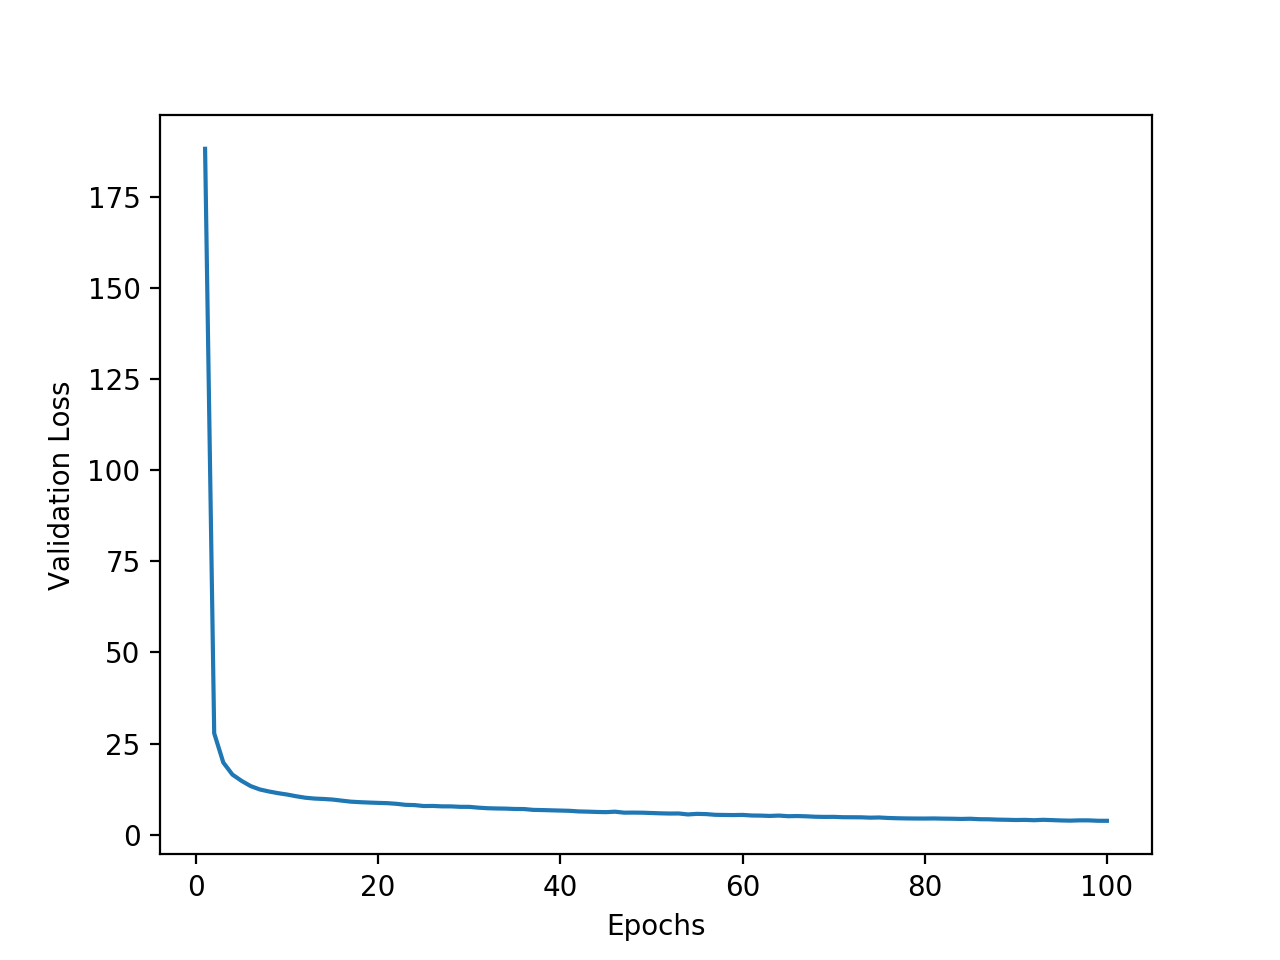

In [60]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.plot(range(1, len(average_mse_history) + 1), average_mse_history)
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.show()

We could see that the curve becomes quite smooth before 10th epoch. 
Therefore, for models below, I will use epoch = 10 instead of 100

In [12]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

In [56]:
test = scalar_model1()
test_fit = test.fit(train_data, train_targets,
  epochs=15, batch_size=16, verbose=0)
test_loss_score, test_mse_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 54us/step


In [57]:
test_mse_score

570.7009983436734

## Model 2

In [88]:
def scalar_model2():
    model = Sequential()
    model.add(Dense(64, input_dim=train_data.shape[1],activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, input_dim=train_data.shape[1], activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])
    return model

In [87]:
num_val_samples = len(train_data) // k 
num_epochs = 15
all_scores2 = []
all_histories2 = []

In [102]:
validation.get_n_splits(train_data)
k_ind = 1
for train_index, test_index in validation.split(train_data):
    print("processing fold #", k_ind)
    X_train, X_test = train_data[train_index], train_data[test_index]
    y_train, y_test = train_targets[train_index], train_targets[test_index]
    model = scalar_model2()
    fit_i = model.fit(X_train, y_train, epochs=num_epochs,\
                              batch_size=1, verbose = 2)
    loss_mse, val_mse = model.evaluate(X_test, y_test, verbose = 0)
    all_scores2.append(val_mse)
    all_histories2.append(fit_i)
    k_ind += 1
        

processing fold # 1
Epoch 1/10
 - 5s - loss: 351.7510 - mean_squared_error: 351.7510
Epoch 2/10
 - 1s - loss: 88.2247 - mean_squared_error: 88.2247
Epoch 3/10
 - 1s - loss: 72.5749 - mean_squared_error: 72.5749
Epoch 4/10
 - 1s - loss: 65.3844 - mean_squared_error: 65.3844
Epoch 5/10
 - 1s - loss: 51.4060 - mean_squared_error: 51.4060
Epoch 6/10
 - 1s - loss: 52.3268 - mean_squared_error: 52.3268
Epoch 7/10
 - 1s - loss: 43.7262 - mean_squared_error: 43.7262
Epoch 8/10
 - 1s - loss: 45.6662 - mean_squared_error: 45.6662
Epoch 9/10
 - 1s - loss: 44.2273 - mean_squared_error: 44.2273
Epoch 10/10
 - 1s - loss: 42.4467 - mean_squared_error: 42.4467
processing fold # 2
Epoch 1/10
 - 5s - loss: 333.3279 - mean_squared_error: 333.3279
Epoch 2/10
 - 1s - loss: 70.6207 - mean_squared_error: 70.6207
Epoch 3/10
 - 1s - loss: 64.1165 - mean_squared_error: 64.1165
Epoch 4/10
 - 1s - loss: 60.4842 - mean_squared_error: 60.4842
Epoch 5/10
 - 1s - loss: 63.6522 - mean_squared_error: 63.6522
Epoch 6/10

In [74]:
all_mse_history2 = []
for history in all_histories2: 
    mse = history.history['mean_squared_error']
    all_mse_history2.append(mse) 

In [75]:
average_mse_history2 = [
    np.mean([x[i] for x in all_mse_history2]) for i in range(num_epochs)]

<IPython.core.display.Javascript object>


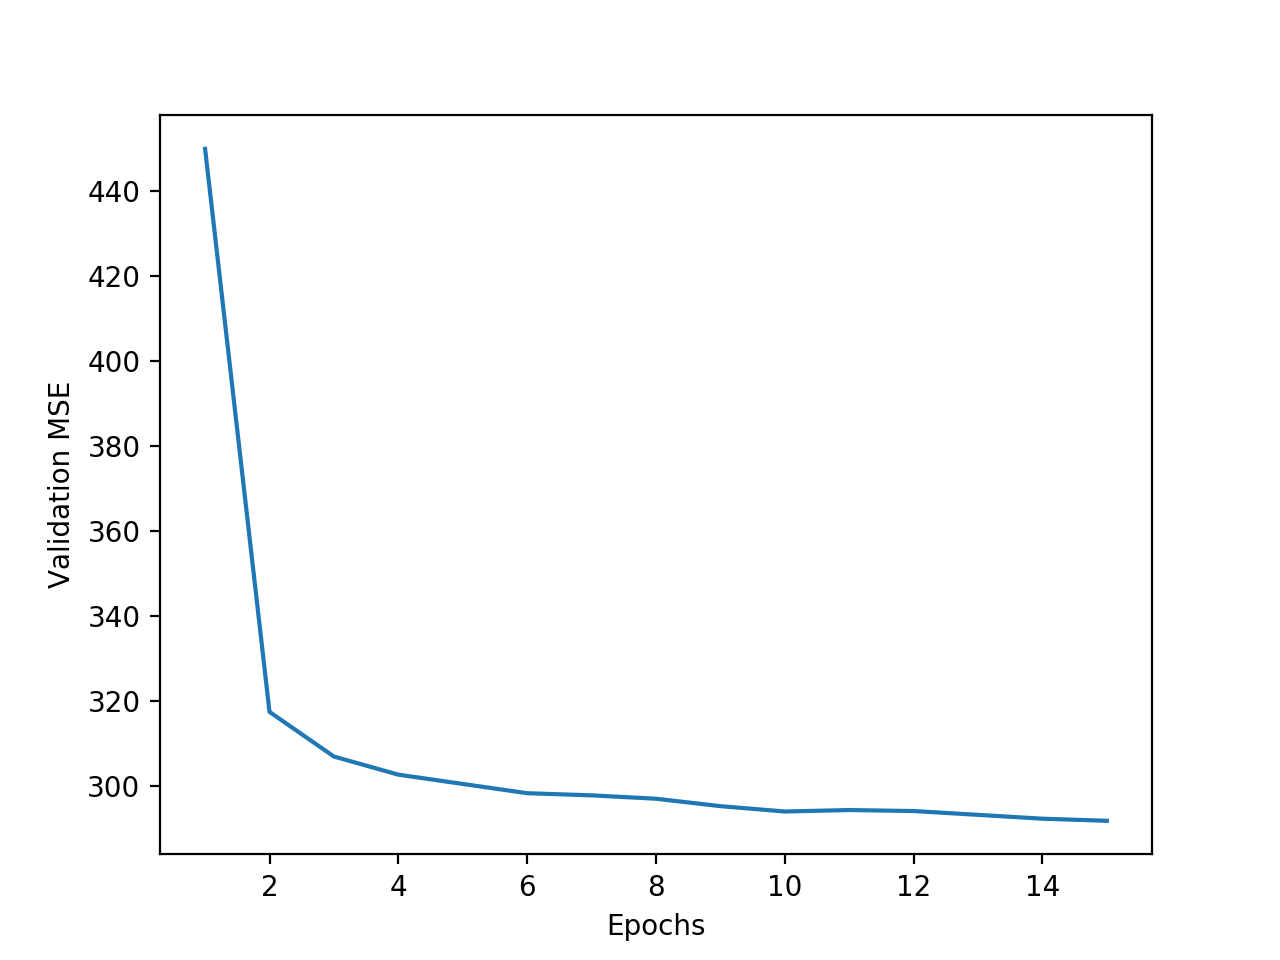

In [76]:
import matplotlib.pyplot as plt
%matplotlib notebook    
plt.plot(range(1, len(average_mse_history2) + 1), average_mse_history2)
plt.xlabel('Epochs')
plt.ylabel('Validation MSE')
plt.show()

In [73]:
## Model 3

In [89]:
def scalar_model3():
    model = Sequential()
    model.add(Dense(64, input_dim=train_data.shape[1],
                    W_regularizer=l1(0.001), activation='relu'))
    model.add(Dense(64, input_dim=train_data.shape[1], \
                    W_regularizer=l1(0.001), activation='relu'))
    model.add(Dense(1))
    
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])
    return model

In [90]:
num_val_samples = len(train_data) // k 
num_epochs = 10
all_scores3 = []
all_histories3 = []
validation.get_n_splits(train_data)
k_ind = 1
for train_index, test_index in validation.split(train_data):
    print("processing fold #", k_ind)
    X_train, X_test = train_data[train_index], train_data[test_index]
    y_train, y_test = train_targets[train_index], train_targets[test_index]
    model = scalar_model2()
    fit_i = model.fit(X_train, y_train, epochs=num_epochs,\
                              batch_size=1, verbose = 2)
    loss_mse, val_mse = model.evaluate(X_test, y_test, verbose = 0)
    all_scores3.append(val_mse)
    all_histories3.append(fit_i)
    k_ind += 1
        

processing fold # 1
Epoch 1/10
 - 4s - loss: 375.2909 - mean_squared_error: 375.2909
Epoch 2/10
 - 1s - loss: 109.6253 - mean_squared_error: 109.6253
Epoch 3/10
 - 1s - loss: 69.1795 - mean_squared_error: 69.1795
Epoch 4/10
 - 1s - loss: 59.0208 - mean_squared_error: 59.0208
Epoch 5/10
 - 1s - loss: 56.9158 - mean_squared_error: 56.9158
Epoch 6/10
 - 1s - loss: 53.6274 - mean_squared_error: 53.6274
Epoch 7/10
 - 1s - loss: 45.1003 - mean_squared_error: 45.1003
Epoch 8/10
 - 1s - loss: 47.2756 - mean_squared_error: 47.2756
Epoch 9/10
 - 1s - loss: 40.2419 - mean_squared_error: 40.2419
Epoch 10/10
 - 1s - loss: 43.8755 - mean_squared_error: 43.8755
processing fold # 2
Epoch 1/10
 - 4s - loss: 301.8182 - mean_squared_error: 301.8182
Epoch 2/10
 - 1s - loss: 97.7792 - mean_squared_error: 97.7792
Epoch 3/10
 - 1s - loss: 66.1290 - mean_squared_error: 66.1290
Epoch 4/10
 - 1s - loss: 56.9773 - mean_squared_error: 56.9773
Epoch 5/10
 - 1s - loss: 54.9813 - mean_squared_error: 54.9813
Epoch 6/

<IPython.core.display.Javascript object>


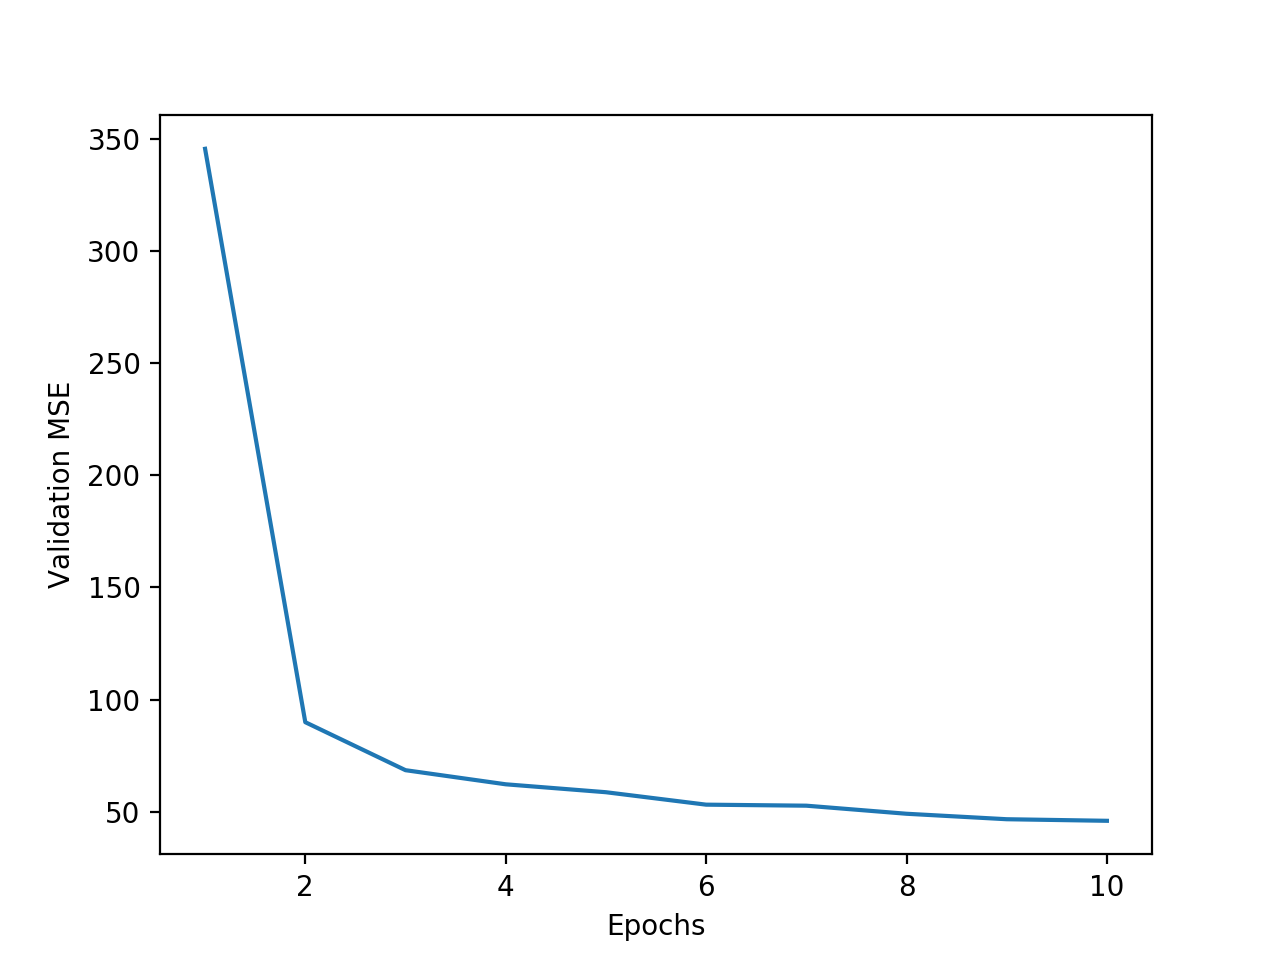

In [91]:
all_mse_history3 = []
for history in all_histories3: 
    mse = history.history['mean_squared_error']
    all_mse_history3.append(mse) 
average_mse_history3 = [np.mean([x[i] for x in all_mse_history3]) for i in range(num_epochs)]
plt.plot(range(1, len(average_mse_history3) + 1), average_mse_history3)
plt.xlabel('Epochs')
plt.ylabel('Validation MSE')
plt.show()

## Model 4

In [92]:
def scalar_model4():
    model = Sequential()
    model.add(Dense(64, input_dim=train_data.shape[1],
                    W_regularizer=l2(0.001), activation='relu'))
    model.add(Dense(64, input_dim=train_data.shape[1], W_regularizer=l2(0.001), 
                    activation='relu'))
    model.add(Dense(1))
    
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])
    return model

In [101]:
num_val_samples = len(train_data) // k 
num_epochs = 10
all_scores4 = []
all_histories4 = []
validation.get_n_splits(train_data)
k_ind = 1
for train_index, test_index in validation.split(train_data):
    print("processing fold #", k_ind)
    X_train, X_test = train_data[train_index], train_data[test_index]
    y_train, y_test = train_targets[train_index], train_targets[test_index]
    model = scalar_model2()
    fit_i = model.fit(X_train, y_train, epochs=num_epochs,\
                              batch_size=1, verbose = 2)
    loss_mse, val_mse = model.evaluate(X_test, y_test, verbose = 0)
    all_scores4.append(val_mse)
    all_histories4.append(fit_i)
    k_ind += 1
        

processing fold # 1
Epoch 1/10
 - 5s - loss: 323.5180 - mean_squared_error: 323.5180
Epoch 2/10
 - 1s - loss: 94.4086 - mean_squared_error: 94.4086
Epoch 3/10
 - 1s - loss: 69.8739 - mean_squared_error: 69.8739
Epoch 4/10
 - 1s - loss: 57.2086 - mean_squared_error: 57.2086
Epoch 5/10
 - 1s - loss: 55.6024 - mean_squared_error: 55.6024
Epoch 6/10
 - 1s - loss: 57.1727 - mean_squared_error: 57.1727
Epoch 7/10
 - 1s - loss: 41.7731 - mean_squared_error: 41.7731
Epoch 8/10
 - 1s - loss: 48.9004 - mean_squared_error: 48.9004
Epoch 9/10
 - 1s - loss: 40.7238 - mean_squared_error: 40.7238
Epoch 10/10
 - 1s - loss: 39.2962 - mean_squared_error: 39.2962
processing fold # 2
Epoch 1/10
 - 5s - loss: 288.4711 - mean_squared_error: 288.4711
Epoch 2/10
 - 1s - loss: 69.6888 - mean_squared_error: 69.6888
Epoch 3/10
 - 1s - loss: 57.8897 - mean_squared_error: 57.8897
Epoch 4/10
 - 1s - loss: 50.6313 - mean_squared_error: 50.6313
Epoch 5/10
 - 1s - loss: 50.3156 - mean_squared_error: 50.3156
Epoch 6/10

<IPython.core.display.Javascript object>


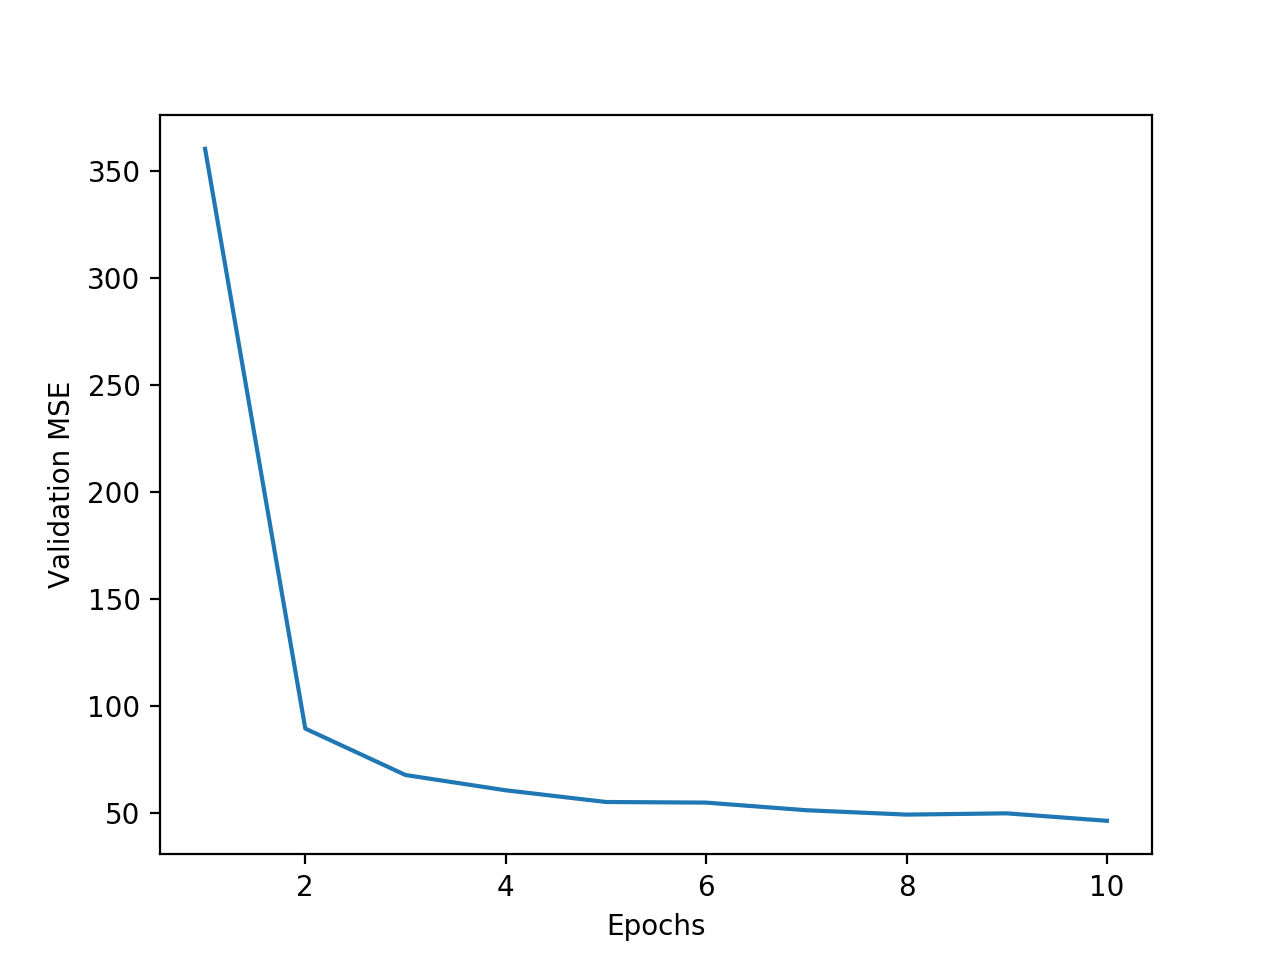

In [96]:
all_mse_history4 = []
for history in all_histories4: 
    mse = history.history['mean_squared_error']
    all_mse_history4.append(mse) 
average_mse4 = [np.mean([x[i] for x in all_mse_history4]) for i in range(num_epochs)]
plt.plot(range(1, len(average_mse4) + 1), average_mse4)
plt.xlabel('Epochs')
plt.ylabel('Validation MSE')
plt.show()

In [97]:
num_val_samples = len(train_data) // k 
num_epochs = 10
all_scores1 = []
all_histories1 = []
validation.get_n_splits(train_data)
k_ind = 1
for train_index, test_index in validation.split(train_data):
    print("processing fold #", k_ind)
    X_train, X_test = train_data[train_index], train_data[test_index]
    y_train, y_test = train_targets[train_index], train_targets[test_index]
    model = scalar_model1()
    fit_i = model.fit(X_train, y_train, epochs=num_epochs,\
                              batch_size=1, verbose = 2)
    loss_mse, val_mse = model.evaluate(X_test, y_test, verbose = 0)
    all_scores1.append(val_mse)
    all_histories1.append(fit_i)
    k_ind += 1
        

processing fold # 1
Epoch 1/10
 - 4s - loss: 205.5582 - mean_squared_error: 205.5582
Epoch 2/10
 - 1s - loss: 22.3375 - mean_squared_error: 22.3375
Epoch 3/10
 - 1s - loss: 17.3545 - mean_squared_error: 17.3545
Epoch 4/10
 - 1s - loss: 15.1291 - mean_squared_error: 15.1291
Epoch 5/10
 - 1s - loss: 13.9143 - mean_squared_error: 13.9143
Epoch 6/10
 - 1s - loss: 13.3553 - mean_squared_error: 13.3553
Epoch 7/10
 - 1s - loss: 12.0244 - mean_squared_error: 12.0244
Epoch 8/10
 - 1s - loss: 11.8836 - mean_squared_error: 11.8836
Epoch 9/10
 - 1s - loss: 11.3616 - mean_squared_error: 11.3616
Epoch 10/10
 - 1s - loss: 11.1074 - mean_squared_error: 11.1074
processing fold # 2
Epoch 1/10
 - 4s - loss: 151.5236 - mean_squared_error: 151.5236
Epoch 2/10
 - 1s - loss: 24.9862 - mean_squared_error: 24.9862
Epoch 3/10
 - 1s - loss: 18.2634 - mean_squared_error: 18.2634
Epoch 4/10
 - 1s - loss: 15.1408 - mean_squared_error: 15.1408
Epoch 5/10
 - 1s - loss: 13.6385 - mean_squared_error: 13.6385
Epoch 6/10

In [103]:
print(np.mean(all_scores1),np.mean(all_scores2), np.mean(all_scores3),\
                                                    np.mean(all_scores4))
                                                    

14.266293878322694 20.258822310610515 19.476671499430648 19.733158932081082


Model 1 has the lowest average MSE score. Therefore, I will run test on model 1 (final model)

In [115]:
test = scalar_model1()
test_fit = test.fit(train_data, train_targets,
  epochs=15, batch_size=1, verbose=2)
test_loss_score, test_mse_score = test.evaluate(test_data, test_targets)

Epoch 1/15
 - 6s - loss: 186.2583 - mean_squared_error: 186.2583
Epoch 2/15
 - 1s - loss: 28.1924 - mean_squared_error: 28.1924
Epoch 3/15
 - 1s - loss: 20.3632 - mean_squared_error: 20.3632
Epoch 4/15
 - 1s - loss: 17.5781 - mean_squared_error: 17.5781
Epoch 5/15
 - 1s - loss: 15.5879 - mean_squared_error: 15.5879
Epoch 6/15
 - 1s - loss: 14.1909 - mean_squared_error: 14.1909
Epoch 7/15
 - 1s - loss: 13.4185 - mean_squared_error: 13.4185
Epoch 8/15
 - 1s - loss: 12.4981 - mean_squared_error: 12.4981
Epoch 9/15
 - 1s - loss: 11.6647 - mean_squared_error: 11.6647
Epoch 10/15
 - 1s - loss: 10.8460 - mean_squared_error: 10.8460
Epoch 11/15
 - 1s - loss: 10.3290 - mean_squared_error: 10.3290
Epoch 12/15
 - 1s - loss: 10.2545 - mean_squared_error: 10.2545
Epoch 13/15
 - 1s - loss: 9.8235 - mean_squared_error: 9.8235
Epoch 14/15
 - 1s - loss: 9.9115 - mean_squared_error: 9.9115
Epoch 15/15
 - 1s - loss: 9.4738 - mean_squared_error: 9.4738
102/102 [==============================] - 2s 19ms/st

In [116]:
test_mse_score

19.73708298627068

<IPython.core.display.Javascript object>


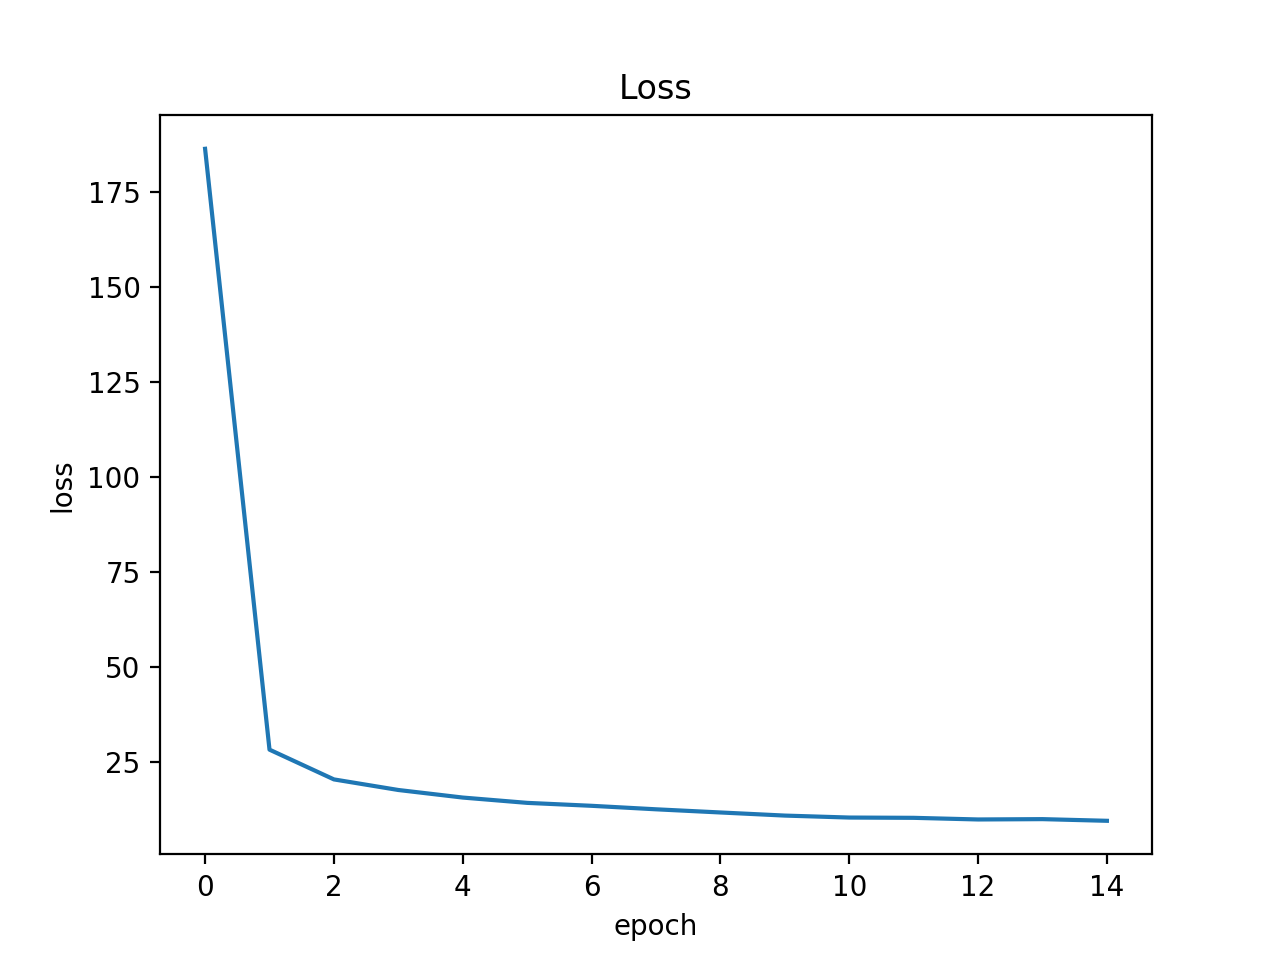

In [118]:
plt.plot(test_fit.history['loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

The test mse score is slightly larger than partial training mse score. 